In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
test_df = pd.read_csv('./out_of_sample_data_with_predictions.csv')
test_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,0,0,1,0,0,0,0,1,0,0.117
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,0,0,1,0,0,0,0,1,0,0.156
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.039
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,0,0,1,0,0,0,0,1,0,0.075
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,0,0,1,0,0,0,1,0,0,0.046


In [ ]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_df['basecase_revenue'] = (np.power(10, test_df['forecast_cons_12m']) + 1) * test_df['forecast_price_energy_off_peak'] + test_df['forecast_meter_rent_12m']

# Taking churn into account
test_df['basecase_revenue_after_churn'] = test_df['basecase_revenue'] * (1 - 0.919 * test_df['churn'])

In [ ]:
test_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,churn,churn_probability,basecase_revenue,basecase_revenue_after_churn
0,4.173390,4.193598,3.165541,3.168368,0.0,2.073828,0.114667,0.099548,40.606701,1,...,1,0,0,0,0,1,0,0.117,171.157200,171.157200
1,4.075036,0.000000,3.003461,3.305998,30.0,1.255031,0.198096,0.000000,46.305378,0,...,1,0,0,0,0,1,0,0.156,402.203316,402.203316
2,3.848435,0.000000,0.000000,2.756568,0.0,1.289366,0.141434,0.000000,44.311378,0,...,1,0,0,0,0,1,0,0.039,82.176885,82.176885
3,4.345433,0.000000,0.000000,3.516690,0.0,1.304921,0.142996,0.000000,44.311378,0,...,1,0,0,0,0,1,0,0.075,471.357082,471.357082
4,4.185655,0.000000,3.355834,3.208148,0.0,2.123067,0.120372,0.103487,40.606701,0,...,1,0,0,0,1,0,0,0.046,196.633386,196.633386


In [ ]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

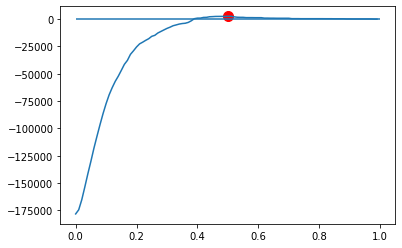

Maximum benefit at cutoff 0.5 with revenue delta of $2,629.47


In [ ]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

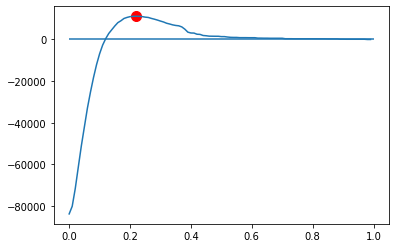

Maximum benefit at cutoff 0.22 with revenue delta of $11,158.90


In [ ]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)